# Infographic
## Luis Fernando Koh Avila
## Data 3 B

## McDonalds DataSet

https://www.kaggle.com/mcdonalds/nutrition-facts
#### In this Notebook we will answer these questions:
- What is the most caloric item in Mcdonalds
- What are the most calories and the least calories per category
- Average of macronutrients in all categories
- Total items per category
- Average of Calories per category

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from itertools import cycle, islice
%matplotlib inline

In [2]:
# Read the file
menu = pd.read_csv('menu.csv')

In [3]:
# Display few information
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
# Find if the data has duplicated rows
duplicate_rows_df = menu[menu.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 24)


In [5]:
# Check if it has null values
print(menu.isnull().sum())

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [6]:
# See the total items per category
menu["Category"].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

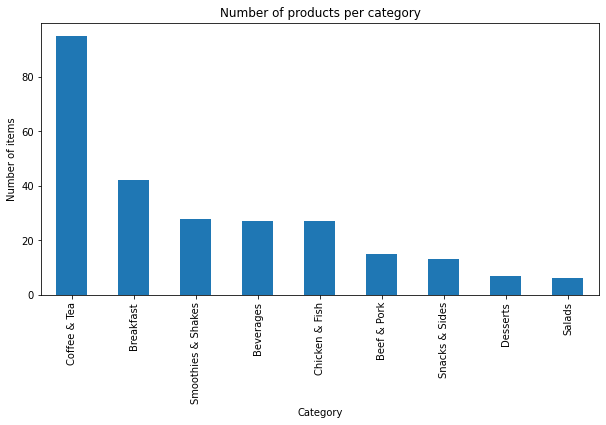

In [7]:
# Plotting a Histogram
menu["Category"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of products per category")
plt.ylabel("Number of items")
plt.xlabel("Category");

In [8]:
# Renaming columns
menu.columns = (['Category', 'Item', 'Serving_Size', 'Calories', 'Calories_from_Fat',
       'Total_Fat', 'Total_Fat_Daily Value', 'Saturated_Fat',
       'Saturated_Fat__Daily_Value', 'Trans Fat', 'Cholesterol',
       'Cholesterol_Daily_Value)', 'Sodium', 'Sodium_Daily_Value)',
       'Carbohydrates', 'Carbohydrates_Daily_Value)', 'Dietary_Fiber',
       'Dietary_Fiber_Daily_Value', 'Sugars', 'Protein',
       'Vitamin_A_Daily Value', 'Vitamin_C_Daily_Value)',
       'Calcium_Daily_Value', 'Iron_Daily_Value'])

In [9]:
# Find the top caloric items overall
top_caloric = menu.loc[:,['Item','Calories']].sort_values('Calories',ascending = False).head(5).reset_index(drop = True).set_index('Item')
top_caloric

,Calories
Item,
Chicken McNuggets (40 piece),1880
Big Breakfast with Hotcakes (Large Biscuit),1150
Big Breakfast with Hotcakes (Regular Biscuit),1090
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit),1050
Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit),990


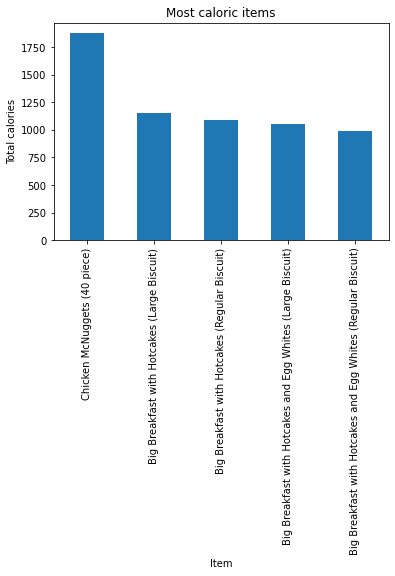

In [10]:
# Plot the top caloric items
graphic = top_caloric['Calories'].plot(kind='bar')
plt.title('Most caloric items')
plt.ylabel('Total calories')
plt.xlabel('Item');

In [11]:
# Find the less caloric items
less_caloric = menu.loc[:,['Item','Calories']].sort_values('Calories',ascending = True).head(20).reset_index(drop = True).set_index('Item')

In [12]:
# Display it
less_caloric

,Calories
Item,
Diet Dr Pepper (Child),0
Iced Tea (Medium),0
Iced Tea (Small),0
Dasani Water Bottle,0
Coffee (Small),0
Coffee (Large),0
Diet Dr Pepper (Large),0
Iced Tea (Large),0
Diet Dr Pepper (Small),0


{'Breakfast': 526,
 'Beef & Pork': 494,
 'Chicken & Fish': 552,
 'Salads': 270,
 'Snacks & Sides': 245,
 'Desserts': 222,
 'Beverages': 113,
 'Coffee & Tea': 283,
 'Smoothies & Shakes': 531}

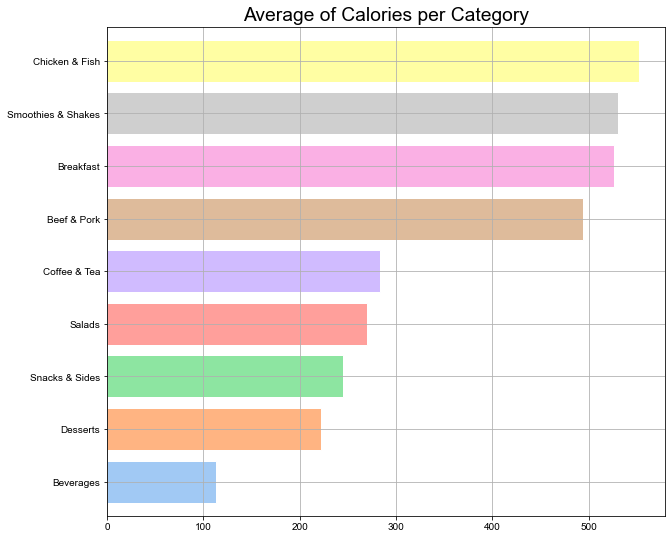

In [13]:
# Calculate the average of calories per Category
f, ax = plt.subplots(figsize=(10, 9))
Average_Calories = {}
sns.set(font_scale=1.6)
for category in menu['Category'].unique():
    mean = int(menu[menu['Category'] == category]['Calories'].mean())
    Average_Calories[category] = mean
pd.Series(Average_Calories).sort_values(ascending=True).plot.barh(width=0.8, color=sns.color_palette('pastel',10), ax=ax)
ax.set_title("Average of Calories per Category")
Average_Calories

Text(0.5, 1.0, 'Average of Protein per Category')

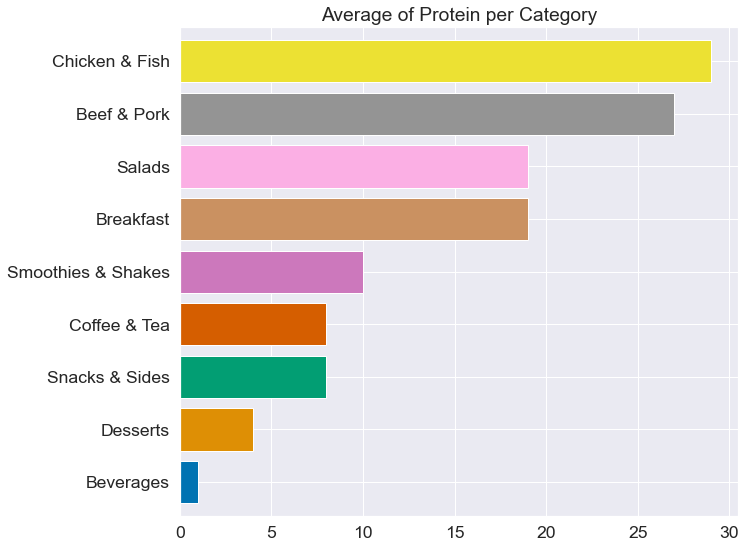

In [14]:
# Calculate the average of protein per Category
f, ax = plt.subplots(figsize=(10, 9))
Average_protein = {}
for category in menu['Category'].unique():
    mean = int(menu[menu['Category'] == category]['Protein'].mean())
    Average_protein[category] = mean
pd.Series(Average_protein).sort_values(ascending=True).plot.barh(width=0.8, color=sns.color_palette('colorblind',10), ax=ax)
ax.set_title("Average of Protein per Category")

Text(0.5, 1.0, 'Average of Carbs per Category')

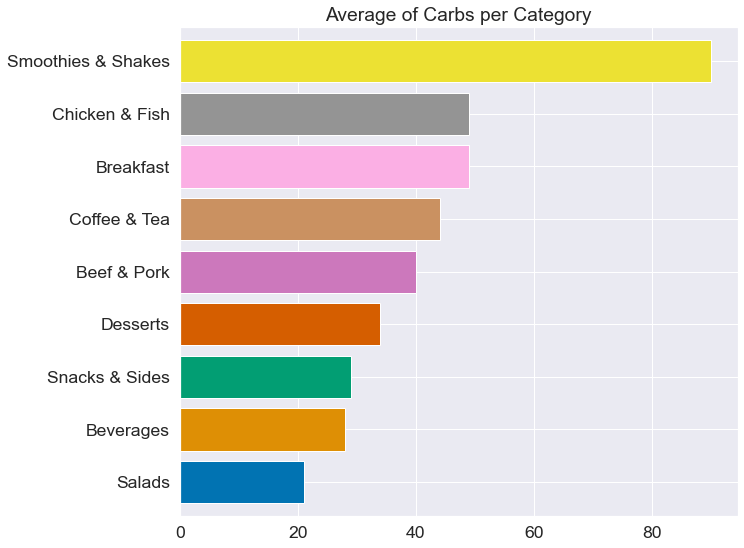

In [15]:
# Calculate the average of protein per Category
f, ax = plt.subplots(figsize=(10, 9))
Average_carbs = {}
for category in menu['Category'].unique():
    mean = int(menu[menu['Category'] == category]['Carbohydrates'].mean())
    Average_carbs[category] = mean
pd.Series(Average_carbs).sort_values(ascending=True).plot.barh(width=0.8, color=sns.color_palette('colorblind',10), ax=ax)
ax.set_title("Average of Carbs per Category")

Text(0.5, 1.0, 'Average of Fat per Category')

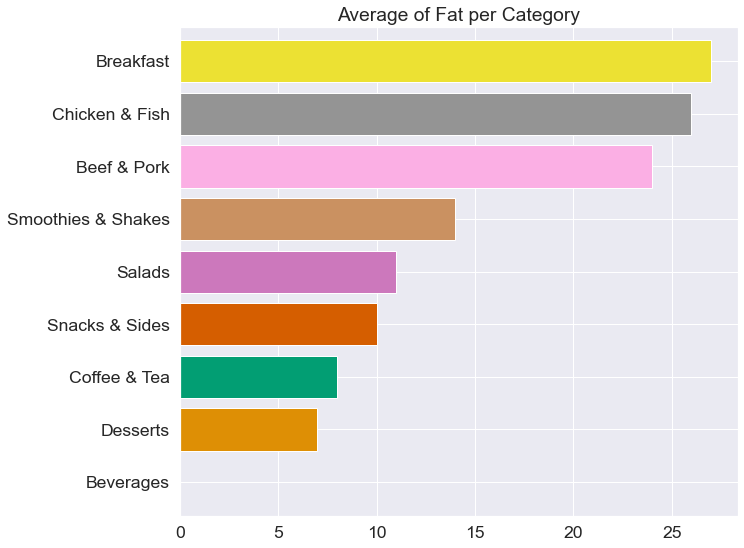

In [16]:
# Calculate the average of protein per Category
f, ax = plt.subplots(figsize=(10, 9))
Average_fat = {}
for category in menu['Category'].unique():
    mean = int(menu[menu['Category'] == category]['Total_Fat'].mean())
    Average_fat[category] = mean
pd.Series(Average_fat).sort_values(ascending=True).plot.barh(width=0.8, color=sns.color_palette('colorblind',10), ax=ax)
ax.set_title("Average of Fat per Category")

In [17]:
# Set index from the last plots
Protein = pd.DataFrame(Average_protein, index = ['Protein']) 
Carbohydrates = pd.DataFrame(Average_carbs, index = ['Carbohydrates']) 
Fat = pd.DataFrame(Average_fat, index = ['Fat']) 

In [18]:
# Concat those macros
macros = pd.concat([Protein, Carbohydrates, Fat])
# Watch the columns
macros.columns

Index(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'],
      dtype='object')

In [19]:
# Display the table
macros

,Breakfast,Beef & Pork,Chicken & Fish,Salads,Snacks & Sides,Desserts,Beverages,Coffee & Tea,Smoothies & Shakes
Protein,19,27,29,19,8,4,1,8,10
Carbohydrates,49,40,49,21,29,34,28,44,90
Fat,27,24,26,11,10,7,0,8,14


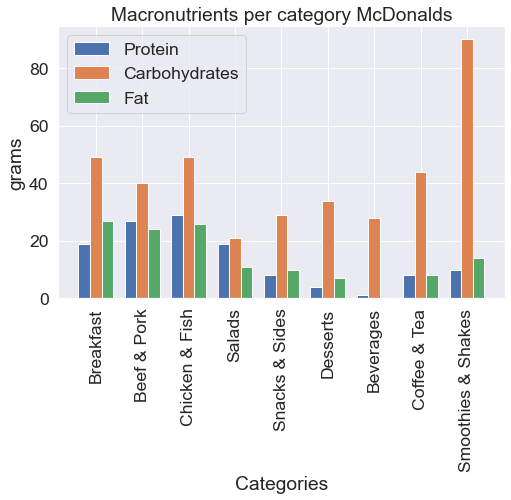

In [20]:
# Show the comparison of Macronutrients per category
w = 0.25
x = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes']
Protein = macros.iloc[0,:].tolist()
Carbohydrates = macros.iloc[1,:].tolist()
Fat = macros.iloc[2,:].tolist()

bar1 = np.arange(len(x))
bar2 = [i + w for i in bar1]
bar3 = [i + w for i in bar2]

plt.figure(figsize=(8,5))
plt.bar(bar1, Protein, w, label = 'Protein')
plt.bar(bar2, Carbohydrates, w, label = 'Carbohydrates')
plt.bar(bar3, Fat, w, label = 'Fat')

plt.xlabel('Categories')
plt.ylabel('grams')
matplotlib.pyplot.xticks(rotation=90)
plt.xticks(bar2, x)
plt.title('Macronutrients per category McDonalds')

plt.legend()
plt.show();

In [21]:
# Less caloric item per category
menu['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [22]:
# Breakfast
l_breakfast = menu.loc[menu['Category'] == 'Breakfast'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]
# Beef & Pork
l_beff_pork = menu.loc[menu['Category'] == 'Beef & Pork'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]
# Chicken & Fish
l_chicken_fish = menu.loc[menu['Category'] == 'Chicken & Fish'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]
# Salads
l_salads = menu.loc[menu['Category'] == 'Salads'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]
# Snacks & Sides
l_snakcs = menu.loc[menu['Category'] == 'Snacks & Sides'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]
# Desserts
l_desserts = menu.loc[menu['Category'] == 'Desserts'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]
# Beverages
l_beverages = menu.loc[menu['Category'] == 'Beverages'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]
# Coffee & Tea
l_coffee_tea = menu.loc[menu['Category'] == 'Coffee & Tea'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]
# Smoothies & Shakes
l_smoothies_shakes = menu.loc[menu['Category'] == 'Smoothies & Shakes'].sort_values('Calories',ascending = True).head(1).loc[:,['Category','Item','Calories']]

In [23]:
less_calories_category = pd.concat([l_breakfast, l_beff_pork, l_chicken_fish, l_salads, l_snakcs, l_desserts, l_beverages, l_coffee_tea, l_smoothies_shakes])
less_calories_category.reset_index(drop = True)

,Category,Item,Calories
0,Breakfast,Hash Brown,150
1,Beef & Pork,Hamburger,240
2,Chicken & Fish,Chicken McNuggets (4 piece),190
3,Salads,Premium Bacon Ranch Salad (without Chicken),140
4,Snacks & Sides,Apple Slices,15
5,Desserts,Kids Ice Cream Cone,45
6,Beverages,Diet Dr Pepper (Medium),0
7,Coffee & Tea,Iced Tea (Small),0
8,Smoothies & Shakes,Strawberry Banana Smoothie (Small),210


Text(0.5, 1.0, 'Calories from the least caloric items per category')

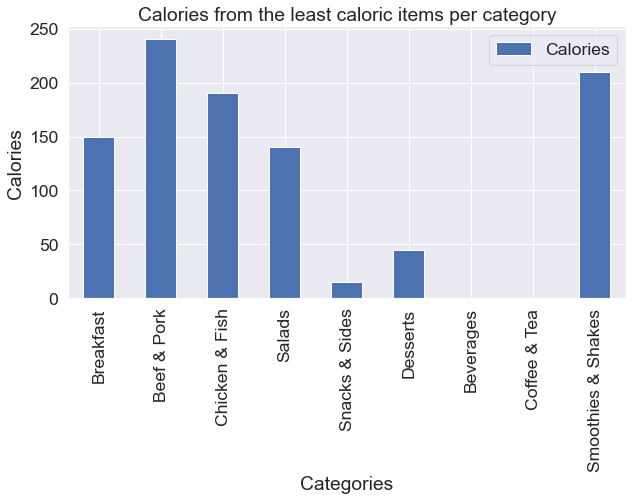

In [24]:
# Display a histogram with the values of least caloric items
less_calories_category.set_index('Category').plot(figsize=(10,5), kind = 'bar')
matplotlib.pyplot.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Calories')
plt.title('Calories from the least caloric items per category')

In [25]:
# Breakfast
m_breakfast = menu.loc[menu['Category'] == 'Breakfast'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]
# Beef & Pork
m_beff_pork = menu.loc[menu['Category'] == 'Beef & Pork'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]
# Chicken & Fish
m_chicken_fish = menu.loc[menu['Category'] == 'Chicken & Fish'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]
# Salads
m_salads = menu.loc[menu['Category'] == 'Salads'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]
# Snacks & Sides
m_snakcs = menu.loc[menu['Category'] == 'Snacks & Sides'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]
# Desserts
m_desserts = menu.loc[menu['Category'] == 'Desserts'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]
# Beverages
m_beverages = menu.loc[menu['Category'] == 'Beverages'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]
# Coffee & Tea
m_coffee_tea = menu.loc[menu['Category'] == 'Coffee & Tea'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]
# Smoothies & Shakes
m_smoothies_shakes = menu.loc[menu['Category'] == 'Smoothies & Shakes'].sort_values('Calories',ascending = False).head(1).loc[:,['Category','Item','Calories']]

In [26]:
more_calories_category = pd.concat([m_breakfast, m_beff_pork, m_chicken_fish, m_salads, m_snakcs, m_desserts, m_beverages, m_coffee_tea, m_smoothies_shakes])
more_calories_category.reset_index(drop = True)
more_calories_category.set_index('Category')

,Item,Calories
Category,,
Breakfast,Big Breakfast with Hotcakes (Large Biscuit),1150
Beef & Pork,Double Quarter Pounder with Cheese,750
Chicken & Fish,Chicken McNuggets (40 piece),1880
Salads,Premium Southwest Salad with Crispy Chicken,450
Snacks & Sides,Large French Fries,510
Desserts,Hot Caramel Sundae,340
Beverages,Sprite (Large),280
Coffee & Tea,Frappé Chocolate Chip (Large),760
Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),930


Text(0.5, 1.0, 'Calories from the most caloric items per category')

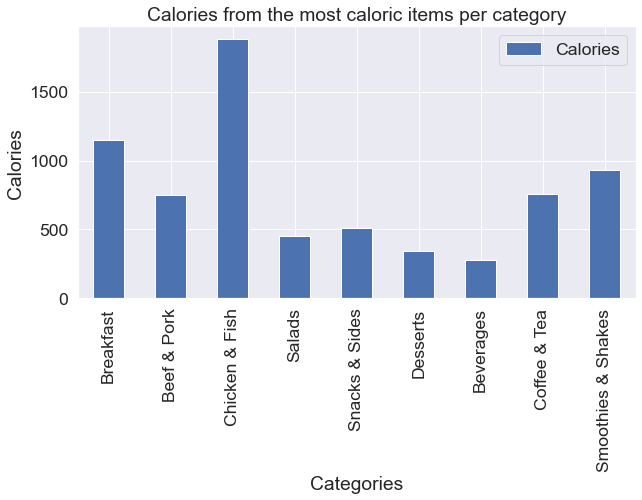

In [27]:
# Display a histogram with the values of most caloric items
more_calories_category.set_index('Category').plot(figsize=(10,5), kind = 'bar')
matplotlib.pyplot.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Calories')
plt.title('Calories from the most caloric items per category')

In [28]:
# Create a dataframe with the most caloric items per category
more_calories_category.columns = ['Category', 'Item', 'Most Calories']
more_calories_category = more_calories_category.loc[:,['Category','Most Calories']].set_index('Category').T
more_calories_category

Category,Breakfast,Beef & Pork,Chicken & Fish,Salads,Snacks & Sides,Desserts,Beverages,Coffee & Tea,Smoothies & Shakes
Most Calories,1150,750,1880,450,510,340,280,760,930


In [29]:
# Create a dataframe with the least caloric items per category
less_calories_category.columns = ['Category', 'Item', 'Least Calories']
less_calories_category = less_calories_category.loc[:,['Category','Least Calories']].set_index('Category').T
less_calories_category

Category,Breakfast,Beef & Pork,Chicken & Fish,Salads,Snacks & Sides,Desserts,Beverages,Coffee & Tea,Smoothies & Shakes
Least Calories,150,240,190,140,15,45,0,0,210


In [30]:
# Concatenate these dataframes
comparison = pd.concat([more_calories_category, less_calories_category])
comparison

Category,Breakfast,Beef & Pork,Chicken & Fish,Salads,Snacks & Sides,Desserts,Beverages,Coffee & Tea,Smoothies & Shakes
Most Calories,1150,750,1880,450,510,340,280,760,930
Least Calories,150,240,190,140,15,45,0,0,210


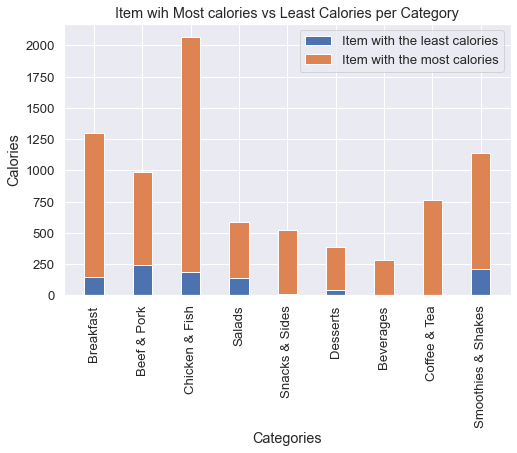

In [31]:
# Plot the bar chart by showing the differences
w = 0.4
x = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes']
sns.set(font_scale=1.2)
Most_Calories = comparison.iloc[0,0:9].tolist()
Least_Calories = comparison.iloc[1,0:9].tolist()

plt.figure(figsize=(8,5))
plt.bar(x, Least_Calories, w, label = 'Item with the least calories')
plt.bar(x, Most_Calories, w, bottom = Least_Calories, label = 'Item with the most calories')

plt.xlabel('Categories')
plt.ylabel('Calories')
matplotlib.pyplot.xticks(rotation=90)
plt.title('Item wih Most calories vs Least Calories per Category')

plt.legend()
plt.show();